In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
dfmc = pd.read_csv('C:/Users/angel/covidmx/Data/Casos_Diarios_Municipio_Confirmados_20210621.csv')

We remove the "nacional" element

In [3]:
dfmc = dfmc.query("nombre != 'Nacional'").copy()
dfmc.head().loc[:, ['nombre', 'poblacion']]

,nombre,poblacion
0,Juarez,15290
1,Jungapeo,22358
2,Lagunillas,5862
3,Madero,18769
4,Torreon,744247


************************************
The 10 most populous municipalities in Mexico are
************************************

In [4]:
maxpop=dfmc.nlargest((10), 'poblacion')
maxpop.loc[:, ['nombre', 'poblacion']]

,nombre,poblacion
995,Iztapalapa,1815551
439,Tijuana,1789531
1228,Ecatepec de Morelos,1707754
1930,Puebla,1698509
752,Leon,1679610
988,Guadalajara,1503505
650,Juarez,1464930
31,Zapopan,1433360
993,Gustavo A. Madero,1176967
1209,Nezahualcoyotl,1135786


************************************
confirmed cases by municipalities
************************************

In [5]:
dfmc

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,21-06-2021
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5035,744247,Torreon,0,0,0,0,0,0,0,...,1,0,2,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,32053,13945,Villa Gonzalez Ortega,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2453,32054,20177,Villa Hidalgo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2454,32055,31804,Villanueva,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2455,32056,155533,Zacatecas,0,0,0,0,0,0,0,...,0,0,6,5,6,1,0,0,0,0


In [6]:
dfmc.shape

(2457, 542)

**********************************************************************************************
The number of cases of covid-19 by municipalities reported in Mexico since the pandemic until now are
**********************************************************************************************

In [7]:
dfmc['total'] = dfmc.iloc[:, -539:-1].sum(axis=1)
dfmc.sort_values('total',inplace=True, ascending = False)
dfmc.loc[:, ['nombre', 'total']]

,nombre,total
995,Iztapalapa,107269
1006,Alvaro Obregon,89264
993,Gustavo A. Madero,76468
1008,Tlalpan,67264
1930,Puebla,54784
...,...,...
1472,San Bartolome Yucuañe,0
1567,San Lorenzo Cuaunecuiltitla,0
1781,Santiago Zoochila,0
1658,San Pedro Yolox,0


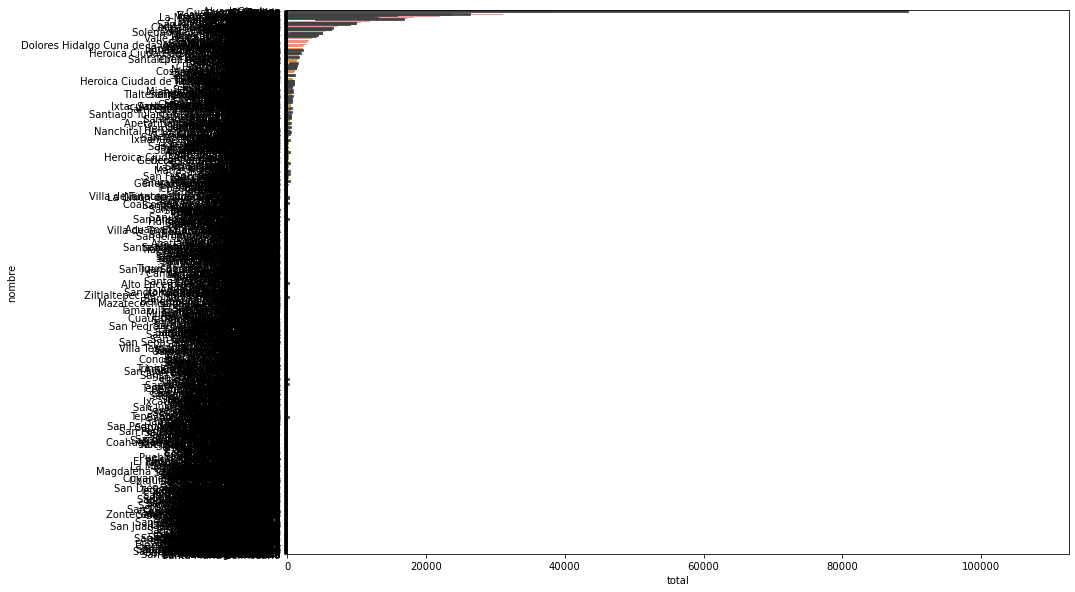

In [8]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=dfmc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The 10 munipalities with the highest number of reported cases with covid -19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [9]:
mcdfmc=dfmc.nlargest((10), 'total')
mcdfmc.loc[:, ['nombre', 'total']]

,nombre,total
995,Iztapalapa,107269
1006,Alvaro Obregon,89264
993,Gustavo A. Madero,76468
1008,Tlalpan,67264
1930,Puebla,54784
1981,Queretaro,49276
752,Leon,44311
2016,San Luis Potosi,39797
991,Coyoacan,39085
60,Monterrey,38145


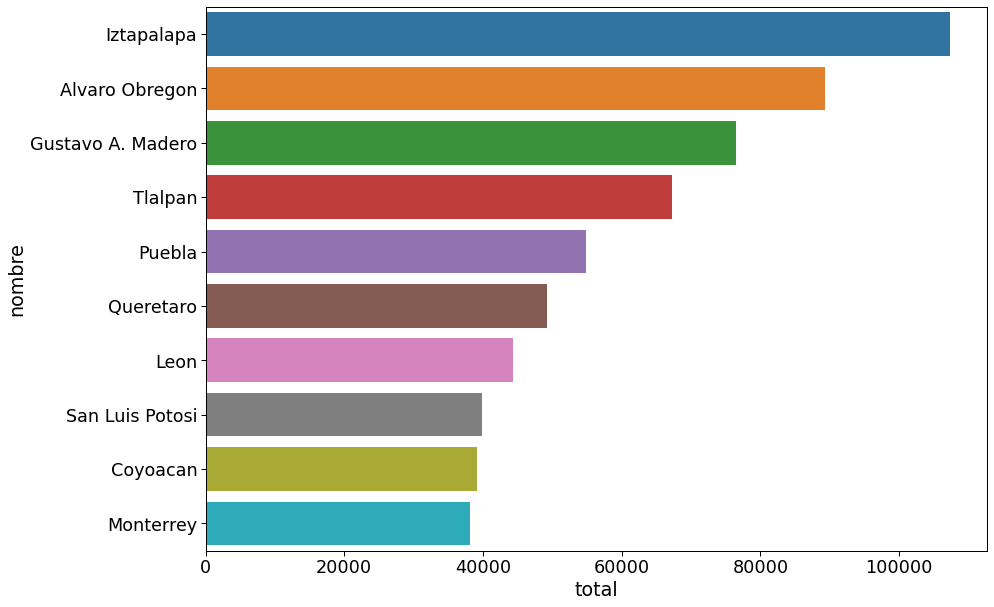

In [10]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=mcdfmc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of cases of covid-19 by municipalities reported in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [11]:
dfmc['rate'] = (dfmc['total']/dfmc['poblacion'])*100000
dfmc.sort_values('rate',inplace=True, ascending = False)
dfmc.head().loc[:, ['nombre', 'total', 'rate']]

,nombre,total,rate
1006,Alvaro Obregon,89264,11814.643095
1008,Tlalpan,67264,9859.373763
1007,Tlahuac,35111,9577.834396
1005,Milpa Alta,13207,9476.146401
996,La Magdalena Contreras,21999,8973.799394


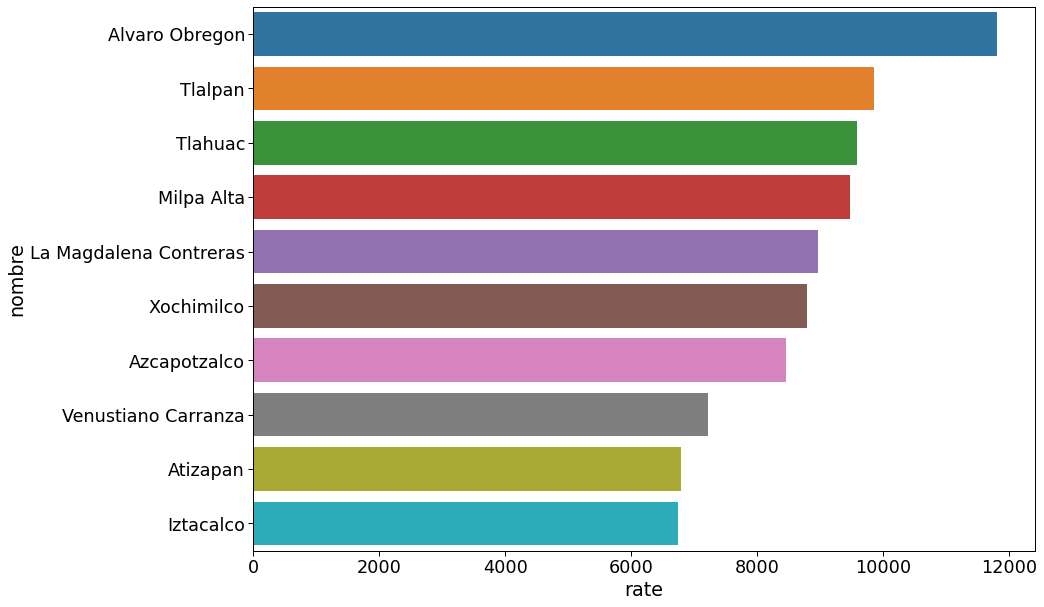

In [12]:
maxratemc=dfmc.nlargest((10), 'rate')
plt.figure(figsize=(14,10))
sns.barplot(x="rate", y="nombre", data=maxratemc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of cases of covid-19 by municipalities reported during the last 60 days in Mexico are
**********************************************************************************************

In [13]:
dfmc['total60'] = dfmc.iloc[:, -63:-3].sum(axis=1)
dfmc['rate60'] = (dfmc['total60']/dfmc['poblacion'])*100000
dfmc.sort_values('rate60',inplace=True, ascending = False)
dfmc.head().loc[:, ['nombre', 'total', 'rate', 'total60', 'rate60']]

,nombre,total,rate,total60,rate60
1420,Santa Magdalena Jicotlan,5,5263.157895,3,3157.894737
1578,San Mateo Cajonos,13,2006.172840,13,2006.172840
2108,Atil,10,1567.398119,10,1567.398119
2115,Granados,33,2820.512821,18,1538.461538
444,Los Cabos,13621,4123.677008,3986,1206.737872


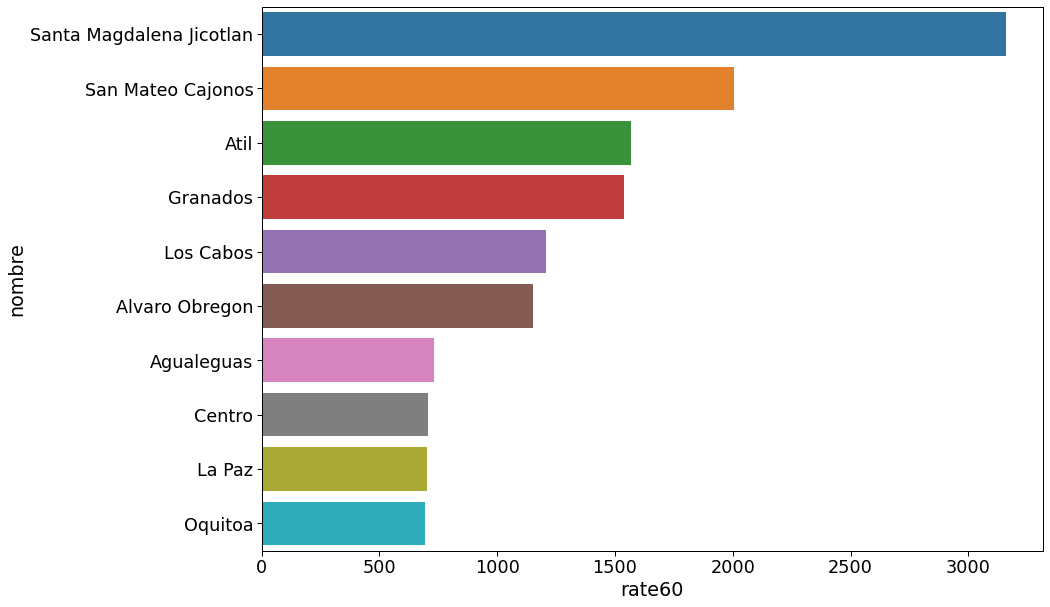

In [14]:
maxrate60mc=dfmc.nlargest((10), 'rate60')
plt.figure(figsize=(14,10))
sns.barplot(x="rate60", y="nombre", data=maxrate60mc)
sns.set_context('paper', font_scale=2)

********************************
deaths by municipalities
********************************

In [15]:
dfmd = pd.read_csv('C:/Users/angel/covidmx/Data/Casos_Diarios_Municipio_Defunciones_20210621.csv')

We remove the "nacional" element

In [16]:
dfmd = dfmd.query("nombre != 'Nacional'").copy()
dfmd.shape

(2457, 521)

************************************
covid deaths by municipalities
************************************

In [17]:
dfmd['total'] = dfmd.iloc[:, -518:-1].sum(axis=1)
dfmd.sort_values('total',inplace=True, ascending = False)
dfmd.loc[:, ['nombre', 'total']]

,nombre,total
995,Iztapalapa,6904
1930,Puebla,6405
1228,Ecatepec de Morelos,5330
993,Gustavo A. Madero,5290
988,Guadalajara,4675
...,...,...
1590,San Miguel Achiutla,0
1397,La Compañia,0
145,Santa Cruz Mixtepec,0
1589,San Mateo Tlapiltepec,0


plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=dfmd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The 10 municipalities with the highest number of death by covid -19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [19]:
mddfmd=dfmd.nlargest((10), 'total')
mddfmd[['nombre','total']]

,nombre,total
995,Iztapalapa,6904
1930,Puebla,6405
1228,Ecatepec de Morelos,5330
993,Gustavo A. Madero,5290
988,Guadalajara,4675
752,Leon,4043
439,Tijuana,3784
650,Juarez,3728
1209,Nezahualcoyotl,3557
60,Monterrey,3335


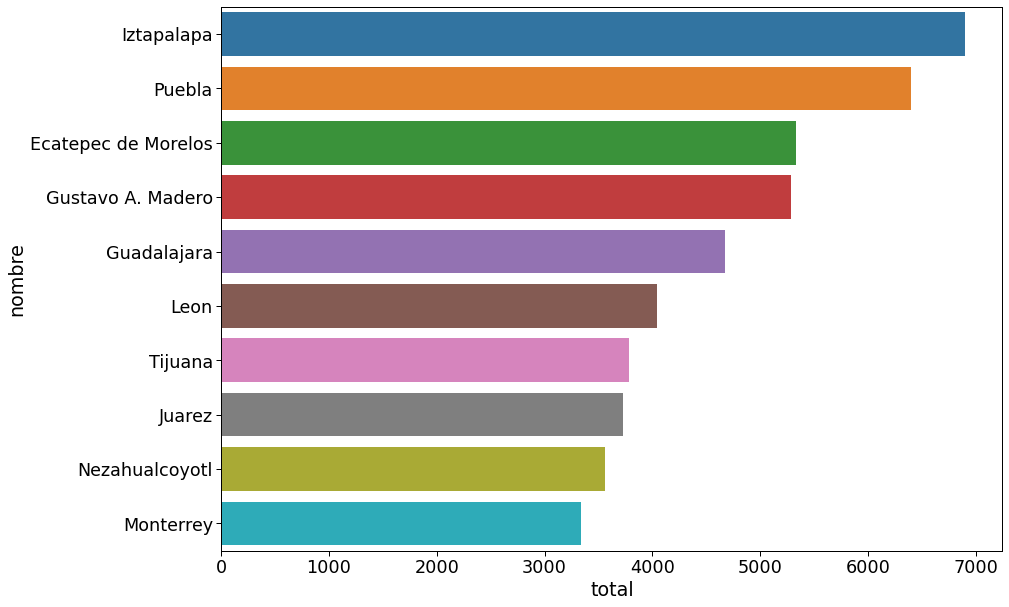

In [20]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=mddfmd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of death by covid-19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [21]:
dfmd['rate'] = (dfmd['total']/dfmd['poblacion'])*100000
dfmd.sort_values('rate',inplace=True, ascending = False)
dfmd.head().loc[:, ['nombre', 'total', 'rate']]

,nombre,total,rate
1201,Atizapan,270,2158.100871
1729,Santo Domingo Tlatayapam,1,704.225352
990,Azcapotzalco,2382,583.193166
994,Iztacalco,2238,568.278482
1878,Coatepec,4,503.144654


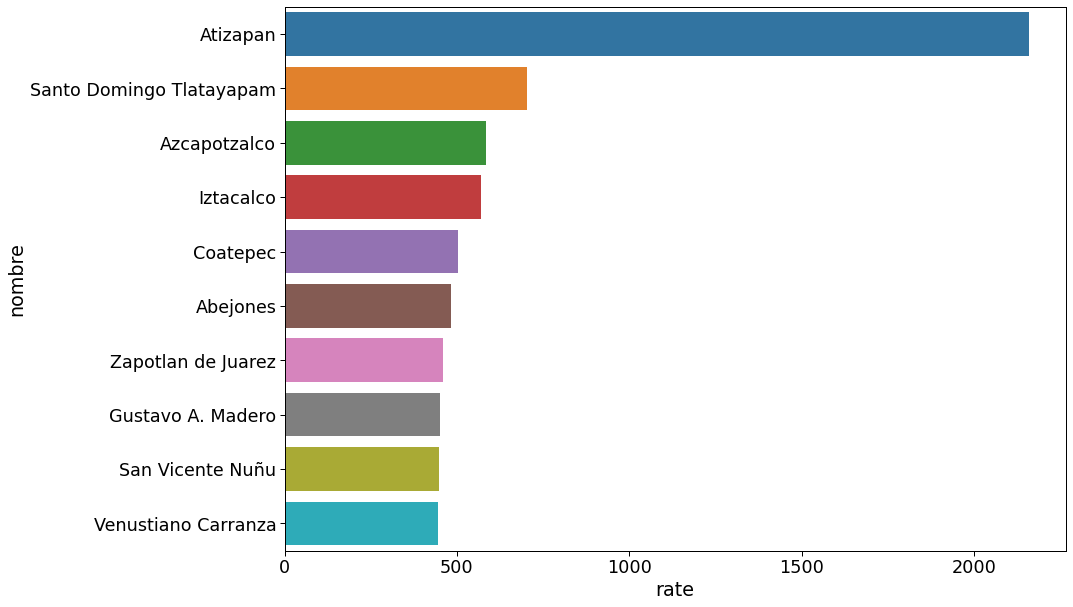

In [22]:
maxratemd=dfmd.nlargest((10), 'rate')
plt.figure(figsize=(14,10))
sns.barplot(x="rate", y="nombre", data=maxratemd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of deaths by covid-19 by municipalities reported during the last 60 days in Mexico are
**********************************************************************************************

In [23]:
dfmd['total60'] = dfmd.iloc[:, -63:-3].sum(axis=1)
dfmd['rate60'] = (dfmd['total60']/dfmd['poblacion'])*100000
dfmd.sort_values('rate60',inplace=True, ascending = False)
dfmd.head().loc[:, ['nombre', 'total', 'rate', 'total60', 'rate60']]

,nombre,total,rate,total60,rate60
209,San Diego la Mesa Tochimiltzingo,2,157.853197,1,78.926598
1788,Santo Domingo Ingenio,18,216.867470,6,72.289157
1820,Valerio Trujano,1,68.306011,1,68.306011
195,Ixcaquixtla,19,201.891404,6,63.755180
406,Tekom,9,261.399942,2,58.088876


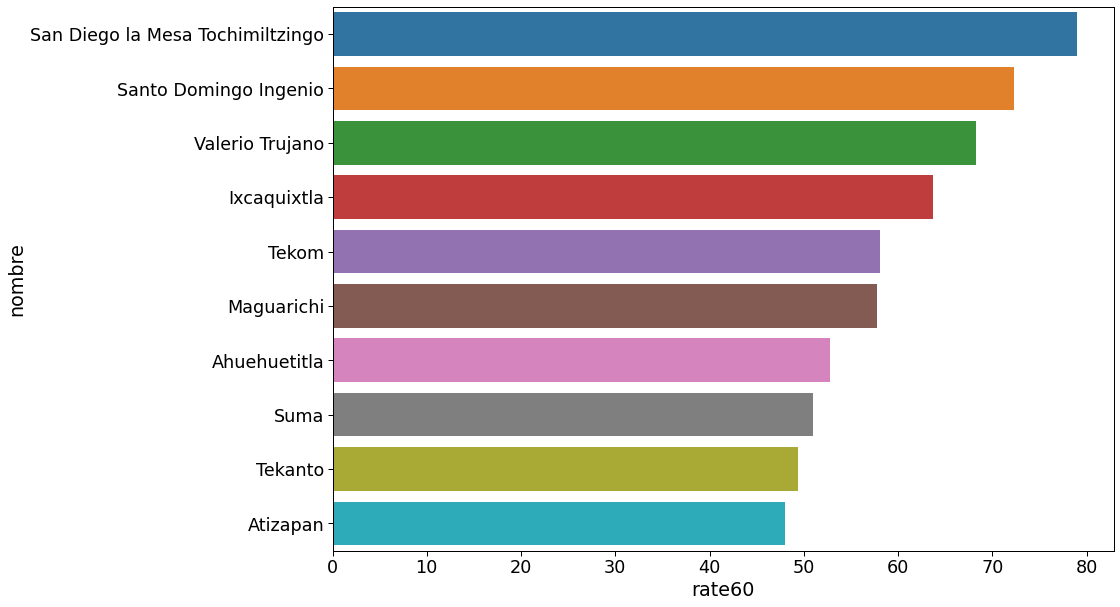

In [24]:
maxrate60md=dfmd.nlargest((10), 'rate60')
plt.figure(figsize=(14,10))
sns.barplot(x="rate60", y="nombre", data=maxrate60md)
sns.set_context('paper', font_scale=2)

In [25]:
dfmmerge= pd.merge(dfmc, dfmd, on='nombre', how='outer')
dfmmerge.head().loc[:, ['nombre', 'total_x', 'total_y']]

,nombre,total_x,total_y
0,Santa Magdalena Jicotlan,5,0
1,San Mateo Cajonos,13,0
2,Atil,10,0
3,Granados,33,1
4,Los Cabos,13621,496


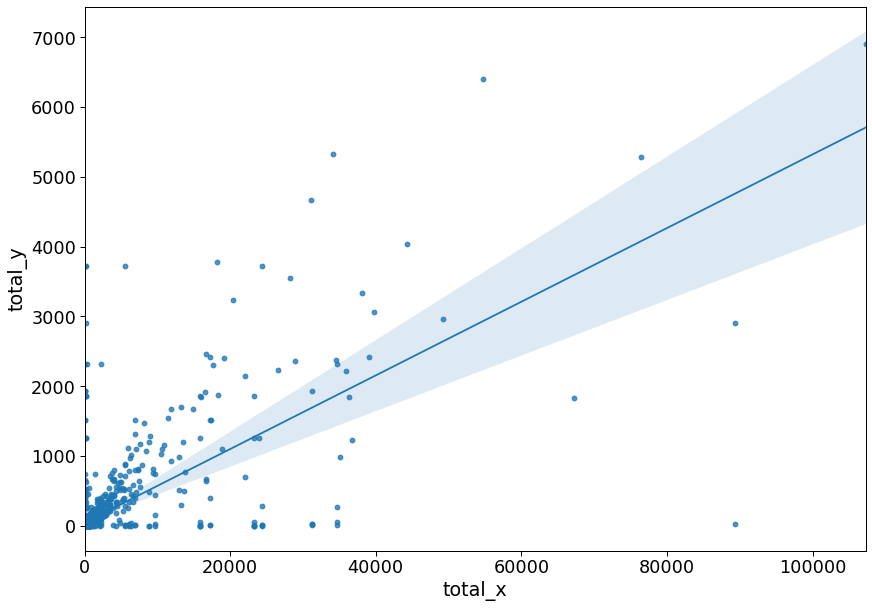

In [26]:
plt.figure(figsize=(14,10))
ax = sns.regplot(x="total_x", y="total_y", data=dfmmerge)
sns.set_context('paper', font_scale=2)

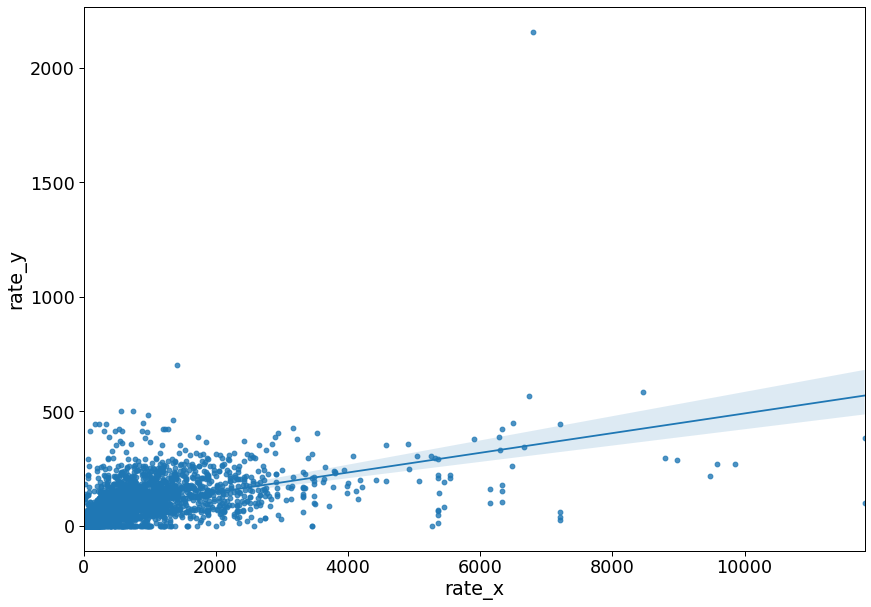

In [29]:
plt.figure(figsize=(14,10))
ax = sns.regplot(x="rate_x", y="rate_y", data=dfmmerge)
sns.set_context('paper', font_scale=2)